<a href="https://colab.research.google.com/github/hichri-mo/Sparks-task1-IPL/blob/main/Spark_indian_sports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import all library
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [ ]:
matches=pd.read_csv('/content/drive/MyDrive/Spark_project/matches.csv')
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [ ]:
matches.shape

(756, 18)

In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
deliveries=pd.read_csv('/content/drive/MyDrive/Spark_project/deliveries.csv')
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


# Data preproccessing

In [ ]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
matches.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches.venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},regex=True,inplace=True)

In [ ]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,Rajiv Gandhi International Stadium,AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M. Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M.A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [ ]:
print(f'Number of rows    = {len(matches)}')
print(f'Number of columns = {len(matches.columns)}')

Number of rows    = 756
Number of columns = 18


In [ ]:
print(f'Number of rows    = {len(deliveries)}')
print(f'Number of columns = {len(deliveries.columns)}')

Number of rows    = 179078
Number of columns = 21


In [ ]:
print(deliveries.columns)
print(matches.columns)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')
Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')


In [ ]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [ ]:
print(matches['winner'].unique())
print(matches['city'].unique())

['Sunrisers Hyderabad' 'Rising Pune Supergiant' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Delhi Daredevils' 'Gujarat Lions' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' nan 'Delhi Capitals']
['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']


In [ ]:
matches.replace('Bangalore','Bengaluru', inplace = True)

In [ ]:
#fill missing values
matches['city'].fillna(matches['venue'], inplace = True)
matches['winner'].fillna(matches['result'], inplace = True)
matches['player_of_match'].fillna(matches['result'], inplace = True)
matches['umpire1'].fillna('unknown', inplace = True)
matches['umpire2'].fillna('unknown', inplace = True)

In [ ]:
matches.drop(['umpire3'], axis = 1, inplace = True)

In [ ]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,Rajiv Gandhi International Stadium,AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M. Chinnaswamy Stadium,unknown,unknown


In [ ]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

# EDA


Top 15 Cities with the maximum number of Matches Played:
               city  Match Counts
23          Mumbai           101
2        Bengaluru            80
21         Kolkata            77
9            Delhi            74
14       Hyderabad            64
7          Chennai            57
16          Jaipur            47
6       Chandigarh            46
26            Pune            38
12          Durban            15
31   Visakhapatnam            13
5        Centurion            12
1        Ahmedabad            12
28          Rajkot            10
22          Mohali            10
10      Dharamsala             9
15          Indore             9
17    Johannesburg             8
29          Ranchi             7
25  Port Elizabeth             7


Text(0.5, 1.0, 'Top Cities that have hosted IPL Matches')

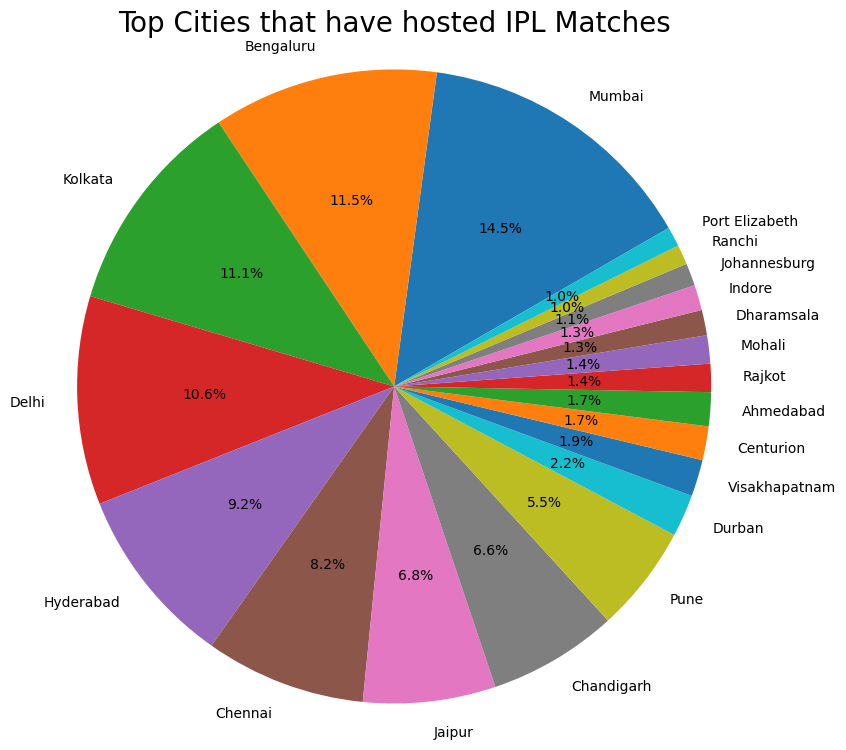

In [ ]:
city_counts=matches.groupby('city').apply(lambda x:x['city'].count()).reset_index(name='Match Counts')
top_cities_order=city_counts.sort_values(by='Match Counts',ascending=False)
top_cities=top_cities_order[:20]
print('Top 15 Cities with the maximum number of Matches Played:\n',top_cities)
plt.figure(figsize=(9,9))
plt.pie(top_cities['Match Counts'],labels=top_cities['city'],autopct='%1.1f%%', startangle=30)
plt.axis('equal')
plt.title('Top Cities that have hosted IPL Matches',size=20)


Top 20 Stadiums with the maximum number of Matches Played:
                                                 venue  Match Counts
15                             M. Chinnaswamy Stadium            80
8                                        Eden Gardens            77
9                                    Feroz Shah Kotla            74
34                                   Wankhede Stadium            73
23                 Rajiv Gandhi International Stadium            64
16                           M.A. Chidambaram Stadium            57
22                 Punjab Cricket Association Stadium            56
26                             Sawai Mansingh Stadium            47
17            Maharashtra Cricket Association Stadium            21
5                          Dr DY Patil Sports Academy            17
31                         Subrata Roy Sahara Stadium            17
14                                          Kingsmead            15
32                                    SuperSport Park   

Text(0.5, 1.0, 'Top Stadiums that have hosted IPL Matches')

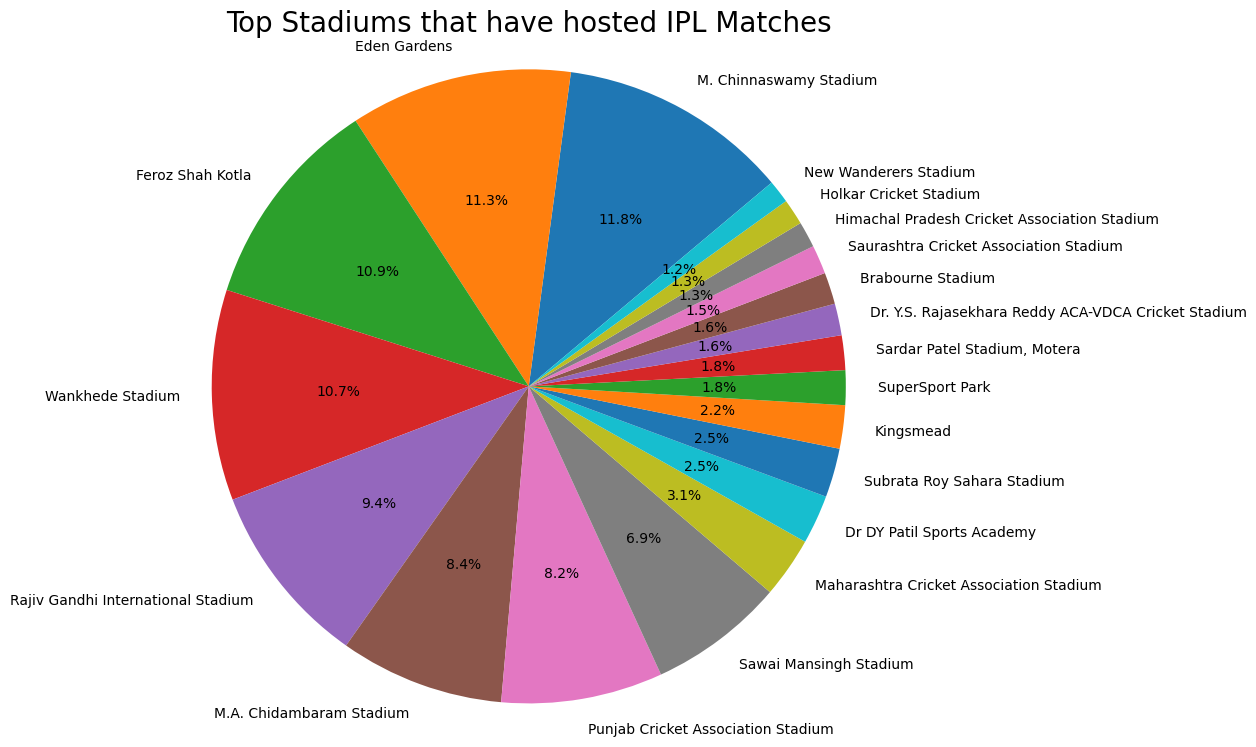

In [ ]:
venue_counts=matches.groupby('venue').apply(lambda x:x['venue'].count()).reset_index(name='Match Counts')
top_venues_order=venue_counts.sort_values(by='Match Counts',ascending=False)
top_venues=top_venues_order[:20]
print('Top 20 Stadiums with the maximum number of Matches Played:\n',top_venues)
plt.figure(figsize=(9,9))
plt.pie(top_venues['Match Counts'],labels=top_venues['venue'],autopct='%1.1f%%', startangle=40)
plt.axis('equal')
plt.title('Top Stadiums that have hosted IPL Matches',size=20)

In [ ]:
batting_tot=deliveries.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batting_sorted=batting_tot.sort_values(by='Runs',ascending=False)
top_batsmen=batting_sorted[:10]
print('The Top 10 Batsmen in thr Tournament are:\n',top_batsmen)
fig = px.bar(top_batsmen, x='batsman', y='Runs',
             hover_data=['batsman'], color='Runs',title='Top 10 Batsmen in IPL- Seasons 2008-2019')
fig.show()

The Top 10 Batsmen in thr Tournament are:
             batsman  Runs
486         V Kohli  5434
428        SK Raina  5415
367       RG Sharma  4914
112       DA Warner  4741
392        S Dhawan  4632
92         CH Gayle  4560
290        MS Dhoni  4477
384      RV Uthappa  4446
26   AB de Villiers  4428
147       G Gambhir  4223


The Top 10 Batting Performances in the IPL History are:
             batsman  Innings Runs  Balls Faced  Strike Rate for Match  inning  \
0          CH Gayle           175           69             253.623188       1   
69      BB McCullum           158           77             205.194805       1   
146  AB de Villiers           133           61             218.032787       1   
207         RR Pant           130           64             203.125000       1   
271  AB de Villiers           129           53             243.396226       1   
324        CH Gayle           128           62             206.451613       1   
386         M Vijay           127           57             222.807018       1   
443       DA Warner           126           60             210.000000       1   
503        V Sehwag           122           62             196.774194       1   
565       SR Watson           121           60             201.666667       2   

                    batting_team                 bo

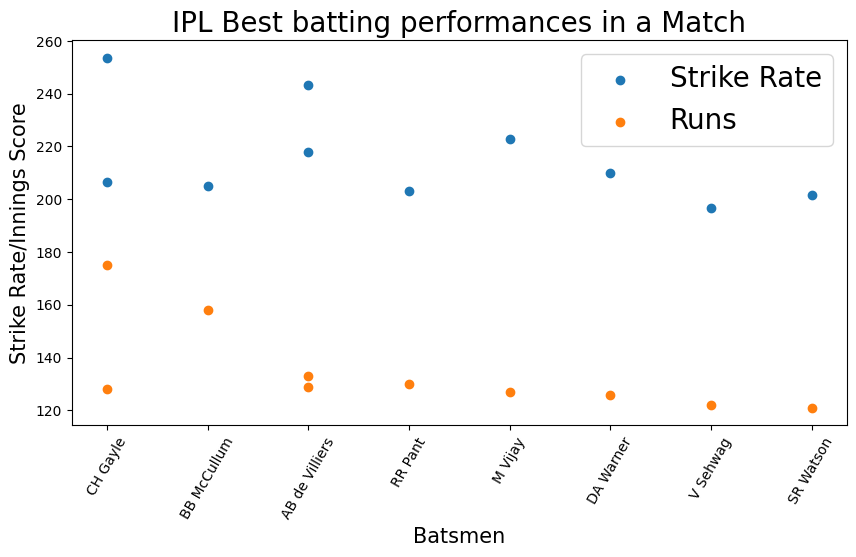

In [ ]:
batting_ings=deliveries.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')
batting_ings_sorted=batting_ings.sort_values(by='Innings Runs',ascending=False)
top_batsmen_scores=batting_ings_sorted[:10]
batsman_ball_faced=deliveries.groupby(['match_id','batsman']).apply(lambda x:x['batsman_runs'].count()).reset_index(name='Balls Faced')
batsmen_performance=pd.merge(top_batsmen_scores,batsman_ball_faced,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_performance['Strike Rate for Match']=batsmen_performance['Innings Runs']*100/batsmen_performance['Balls Faced']
batsmen_innings=pd.merge(batsmen_performance,deliveries,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_innings_req=batsmen_innings.iloc[:,1:8]
batsmen_innings_req_2=batsmen_innings_req.drop_duplicates()
print('The Top 10 Batting Performances in the IPL History are:\n',batsmen_innings_req_2)
x=batsmen_innings_req_2['batsman']
y1=batsmen_innings_req_2['Strike Rate for Match']
y2=batsmen_innings_req_2['Innings Runs']
plt.figure(figsize=(10,5))
plt.scatter(x,y1)
plt.scatter(x,y2)
plt.xlabel('Batsmen',size=15)
plt.ylabel('Strike Rate/Innings Score',size=15)
plt.title('IPL Best batting performances in a Match',size=20)
plt.xticks(rotation=60)
plt.legend(['Strike Rate','Runs'],prop={'size':20})


In [ ]:
bowling_wickets=deliveries[deliveries['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10]
print('The Top Wicket Takers in the Tournament are:\n',top_bowlers)
fig = px.bar(top_bowlers, x='bowler', y='Wickets',
             hover_data=['bowler'], color='Wickets',title='Top 10 Bowlers in IPL- Seasons 2008-2019')
fig.show()

The Top Wicket Takers in the Tournament are:
               bowler  Wickets
290       SL Malinga      170
6           A Mishra      156
110  Harbhajan Singh      150
227        PP Chawla      149
82          DJ Bravo      147
46           B Kumar      133
232         R Ashwin      125
296        SP Narine      122
326         UT Yadav      119
244        RA Jadeja      108


The Top 10 Batting Performances in the IPL History are:
               bowler  Wickets  Runs Conceeded  Runs per Wicket  inning  \
0            A Zampa        6              19         3.166667       1   
24          A Joseph        6              18         3.000000       2   
48     Sohail Tanvir        6              15         2.500000       1   
72        AS Rajpoot        5              16         3.200000       1   
96        SL Malinga        5              13         2.600000       1   
119          B Kumar        5              20         4.000000       2   
144         A Mishra        5              17         3.400000       2   
168  Harbhajan Singh        5              18         3.600000       2   
193         MM Patel        5              25         5.000000       1   
217       JD Unadkat        5              30         6.000000       2   

            batting_team             bowling_team  
0    Sunrisers Hyderabad  Rising Pune Supergiants  
24   Sunrisers Hyderabad

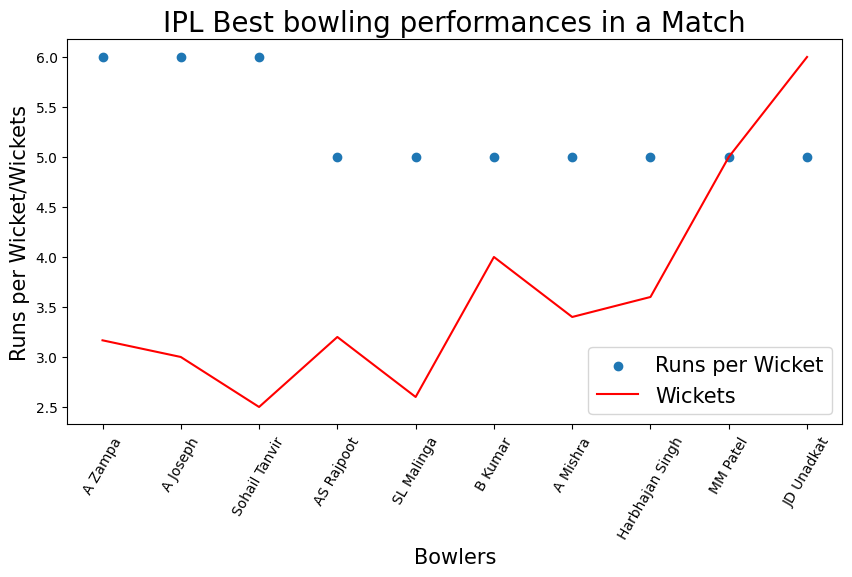

In [ ]:
match_bowling_tot=bowling_wickets.groupby(['match_id','bowler']).apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
match_bowling_wick_count=match_bowling_tot.groupby(['match_id','bowler']).count().reset_index()
match_bowling_top=match_bowling_wick_count.sort_values(by='Wickets',ascending=False)
match_top_bowlers=match_bowling_top.loc[:,['match_id','bowler','Wickets']][0:10]
match_bowling_runs=deliveries.groupby(['match_id','bowler']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
match_bowler_performance=pd.merge(match_top_bowlers,match_bowling_runs,how='inner',left_on=['match_id','bowler'],right_on=['match_id','bowler'])
match_bowler_performance['Runs per Wicket']=match_bowler_performance['Runs Conceeded']/match_bowler_performance['Wickets']
bowler_innings=pd.merge(match_bowler_performance,deliveries,how='inner',left_on=['match_id','bowler'],right_on=['match_id','bowler'])
bowler_innings_req=bowler_innings.iloc[:,1:8]
bowler_innings_req_2=bowler_innings_req.drop_duplicates()
print('The Top 10 Batting Performances in the IPL History are:\n',bowler_innings_req_2)
x=bowler_innings_req_2['bowler']
y1=bowler_innings_req_2['Wickets']
y2=bowler_innings_req_2['Runs per Wicket']
plt.figure(figsize=(10,5))
plt.scatter(x,y1)
plt.plot(x,y2,'r')
plt.xlabel('Bowlers',size=15)
plt.ylabel('Runs per Wicket/Wickets',size=15)
plt.title('IPL Best bowling performances in a Match',size=20)
plt.xticks(rotation=60)
plt.legend(['Runs per Wicket','Wickets'],prop={'size':15})


In [ ]:
# Group by 'fielder' and count dismissals
fielder_list_count = deliveries.dropna(subset=['fielder']).groupby('fielder').count()
fielder_list_counts = fielder_list_count['dismissal_kind'].reset_index(name='Dismissals')

# Sort values and select top 10 fielders
fielder_list_max = fielder_list_counts.sort_values(by='Dismissals', ascending=False)
top_fielders = fielder_list_max.head(10)

print('The Best Fielders(and WicketKeepers) in the Tournament are:\n', top_fielders)

fig = px.bar(top_fielders, x='fielder', y='Dismissals',
             hover_data=['fielder'], color='Dismissals',
             title='Top 10 Fielders in IPL - Seasons 2008-2019')
fig.show()


The Best Fielders(and WicketKeepers) in the Tournament are:
             fielder  Dismissals
279        MS Dhoni         159
206      KD Karthik         152
372      RV Uthappa         125
412        SK Raina         115
19   AB de Villiers         114
313        PA Patel          97
355       RG Sharma          92
470         V Kohli          90
200      KA Pollard          85
484         WP Saha          82


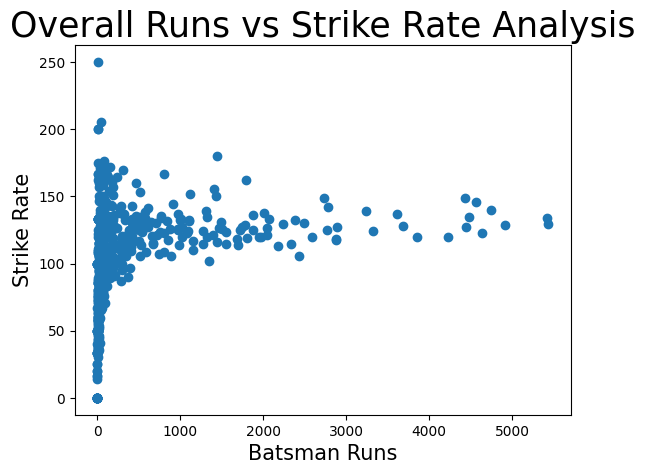

The Top 10 batsmen having highest strike rate, scoring atleast 1000 Runs:
             batsman  Runs  Strike Rate
34       AD Russell  1445   179.950187
374         RR Pant  1792   162.318841
153      GJ Maxwell  1403   155.543237
163       HH Pandya  1118   151.902174
189      JC Buttler  1431   150.000000
488        V Sehwag  2728   148.827059
26   AB de Villiers  4428   148.740343
92         CH Gayle  4560   145.640370
213      KA Pollard  2784   141.751527
112       DA Warner  4741   139.523249


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'AD Russell'),
  Text(1, 0, 'RR Pant'),
  Text(2, 0, 'GJ Maxwell'),
  Text(3, 0, 'HH Pandya'),
  Text(4, 0, 'JC Buttler'),
  Text(5, 0, 'V Sehwag'),
  Text(6, 0, 'AB de Villiers'),
  Text(7, 0, 'CH Gayle'),
  Text(8, 0, 'KA Pollard'),
  Text(9, 0, 'DA Warner')])

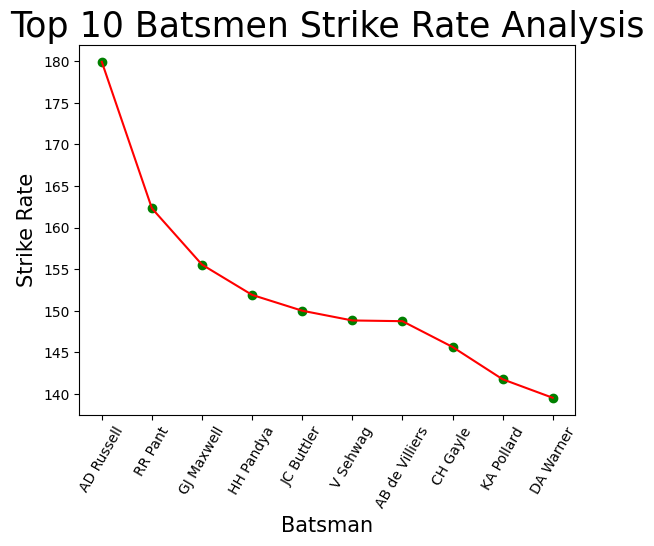

In [ ]:
Target_run=1000
batting_tot=deliveries.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batsman_balls_faced=deliveries.groupby('batsman').count()
batsman_balls_faced_count=batsman_balls_faced['ball'].reset_index(name='Balls Faced')
batsman_runs_balls=pd.merge(batting_tot,batsman_balls_faced_count,left_on='batsman',right_on='batsman',how='outer')
batsman_strike_rate=batsman_runs_balls.groupby(['batsman','Runs']).apply(lambda x:((x['Runs'])/(x['Balls Faced']))*100).reset_index(name='Strike Rate')
plt.scatter(batsman_strike_rate['Runs'],batsman_strike_rate['Strike Rate'])
plt.plot(np.mean(batsman_strike_rate['Strike Rate']),'r')
plt.xlabel('Batsman Runs',size=15)
plt.ylabel('Strike Rate',size=15)
plt.title('Overall Runs vs Strike Rate Analysis',size=25)
plt.show()
batsman_strike_rate_list=batsman_strike_rate.sort_values(by='Strike Rate',ascending=False)
batsman_strike_rate_above_target_runs=batsman_strike_rate_list[batsman_strike_rate_list['Runs']>=Target_run]
top_strike_rate_batsman=batsman_strike_rate_above_target_runs.loc[:,['batsman','Runs','Strike Rate']][0:10]
print('The Top 10 batsmen having highest strike rate, scoring atleast {} Runs:\n'.format(Target_run),top_strike_rate_batsman)
plt.plot(top_strike_rate_batsman['batsman'],top_strike_rate_batsman['Strike Rate'],color='r')
plt.scatter(top_strike_rate_batsman['batsman'],top_strike_rate_batsman['Strike Rate'],color='g')
plt.xlabel('Batsman',size=15)
plt.ylabel('Strike Rate',size=15)
plt.title('Top 10 Batsmen Strike Rate Analysis',size=25)
plt.xticks(rotation=60)

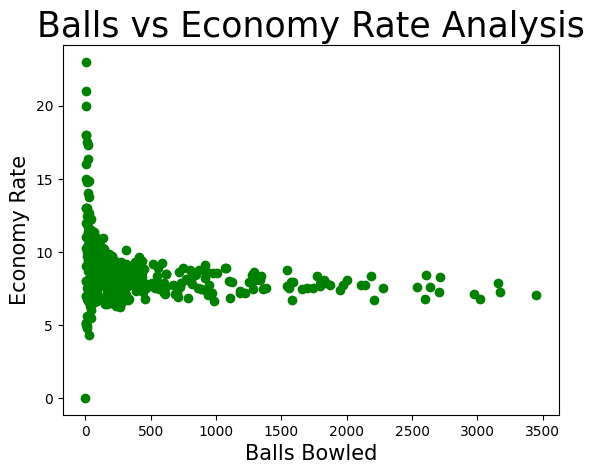

The Top 10 bowlers having best economy rate, bowling atleast 1000 balls:
               bowler  Balls Bowled  Economy Rate
108         DW Steyn          2207      6.671500
207   M Muralitharan          1581      6.698292
269         R Ashwin          3016      6.746021
347        SP Narine          2600      6.782308
301      Rashid Khan          1106      6.819168
126  Harbhajan Singh          3451      7.041437
340       SL Malinga          2974      7.083389
339         SK Warne          1223      7.187244
202         M Kartik          1182      7.197970
53           B Kumar          2707      7.234577


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'DW Steyn'),
  Text(1, 0, 'M Muralitharan'),
  Text(2, 0, 'R Ashwin'),
  Text(3, 0, 'SP Narine'),
  Text(4, 0, 'Rashid Khan'),
  Text(5, 0, 'Harbhajan Singh'),
  Text(6, 0, 'SL Malinga'),
  Text(7, 0, 'SK Warne'),
  Text(8, 0, 'M Kartik'),
  Text(9, 0, 'B Kumar')])

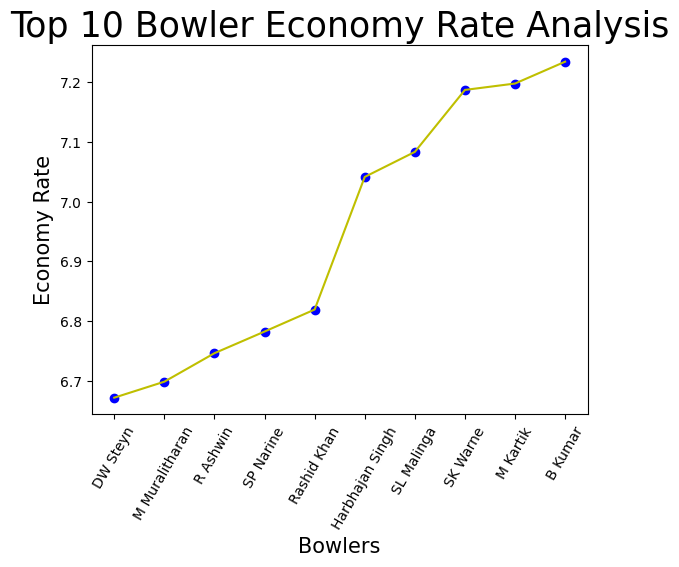

In [ ]:
Ball_Limit=1000
bowling_runs=deliveries.groupby('bowler').apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
bowling_balls=deliveries.groupby('bowler').count()
bowled_balls=bowling_balls['ball'].reset_index(name='Balls Bowled')
bowler_stats=pd.merge(bowling_runs,bowled_balls,left_on='bowler',right_on='bowler',how='outer')
bowler_economy_rate=bowler_stats.groupby(['bowler','Balls Bowled']).apply(lambda x:(((x['Runs Conceeded'])/(x['Balls Bowled']))*6)).reset_index(name='Economy Rate')
plt.scatter(bowler_economy_rate['Balls Bowled'],bowler_economy_rate['Economy Rate'],color='g')
plt.xlabel('Balls Bowled',size=15)
plt.ylabel('Economy Rate',size=15)
plt.title('Balls vs Economy Rate Analysis',size=25)
plt.show()
bowler_best_economy_rate=bowler_economy_rate.sort_values(by='Economy Rate',ascending=True)
bowler_best_economy_rate_condition=bowler_best_economy_rate[bowler_best_economy_rate['Balls Bowled']>=Ball_Limit]
top_10_economy=bowler_best_economy_rate_condition.loc[:,['bowler','Balls Bowled','Economy Rate']][0:10]
print('The Top 10 bowlers having best economy rate, bowling atleast {} balls:\n'.format(Ball_Limit),top_10_economy)
plt.plot(top_10_economy['bowler'],top_10_economy['Economy Rate'],color='y')
plt.scatter(top_10_economy['bowler'],top_10_economy['Economy Rate'],color='b')
plt.xlabel('Bowlers',size=15)
plt.ylabel('Economy Rate',size=15)
plt.title('Top 10 Bowler Economy Rate Analysis',size=25)
plt.xticks(rotation=60)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'CH Gayle'),
  Text(1, 0, 'AB de Villiers'),
  Text(2, 0, 'DA Warner'),
  Text(3, 0, 'RG Sharma'),
  Text(4, 0, 'MS Dhoni'),
  Text(5, 0, 'YK Pathan'),
  Text(6, 0, 'SR Watson'),
  Text(7, 0, 'SK Raina'),
  Text(8, 0, 'G Gambhir'),
  Text(9, 0, 'V Kohli'),
  Text(10, 0, 'MEK Hussey'),
  Text(11, 0, 'AM Rahane'),
  Text(12, 0, 'AD Russell'),
  Text(13, 0, 'V Sehwag'),
  Text(14, 0, 'DR Smith')])

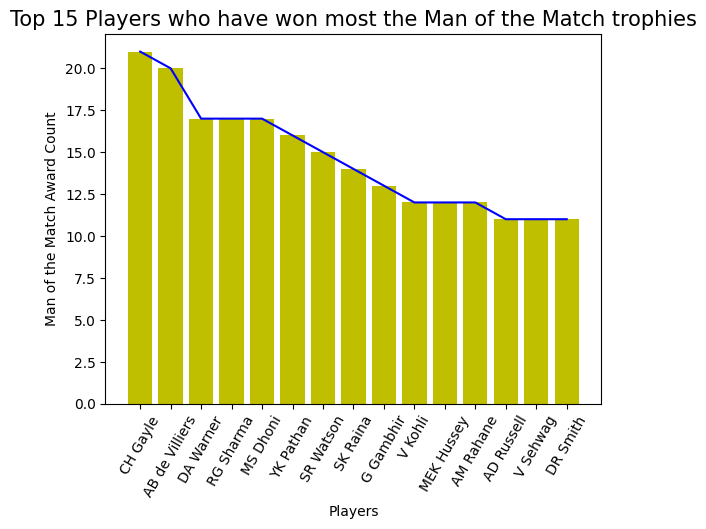

In [ ]:
motm=matches.groupby('player_of_match').apply(lambda x:x['player_of_match'].count()).reset_index(name='Man of the Match Awards')
motm_sort=motm.sort_values(by='Man of the Match Awards',ascending=False)
motm_top=motm_sort[0:15]
plt.plot(motm_top['player_of_match'],motm_top['Man of the Match Awards'],color='b')
plt.bar(motm_top['player_of_match'],motm_top['Man of the Match Awards'],color='y')
plt.xlabel('Players')
plt.ylabel('Man of the Match Award Count')
plt.title('Top 15 Players who have won most the Man of the Match trophies',size=15)
plt.xticks(rotation=60)

The top 10 best players overall are:
              batsman  Runs  Wickets  Dismissals  Overall Score
228         SK Raina  5415       25       115.0         4232.5
65          DJ Bravo  1498      147        78.0         3734.0
259          V Kohli  5434        4        90.0         3677.0
237        SR Watson  3614       92        44.0         3627.0
194        RG Sharma  4914       15        92.0         3602.0
190        RA Jadeja  1951      108        80.0         3395.5
85   Harbhajan Singh   834      150        46.0         3127.0
207         S Dhawan  4632        4        73.0         3106.0
115       KA Pollard  2784       56        85.0         3082.0
173        PP Chawla   587      149        43.0         2958.5


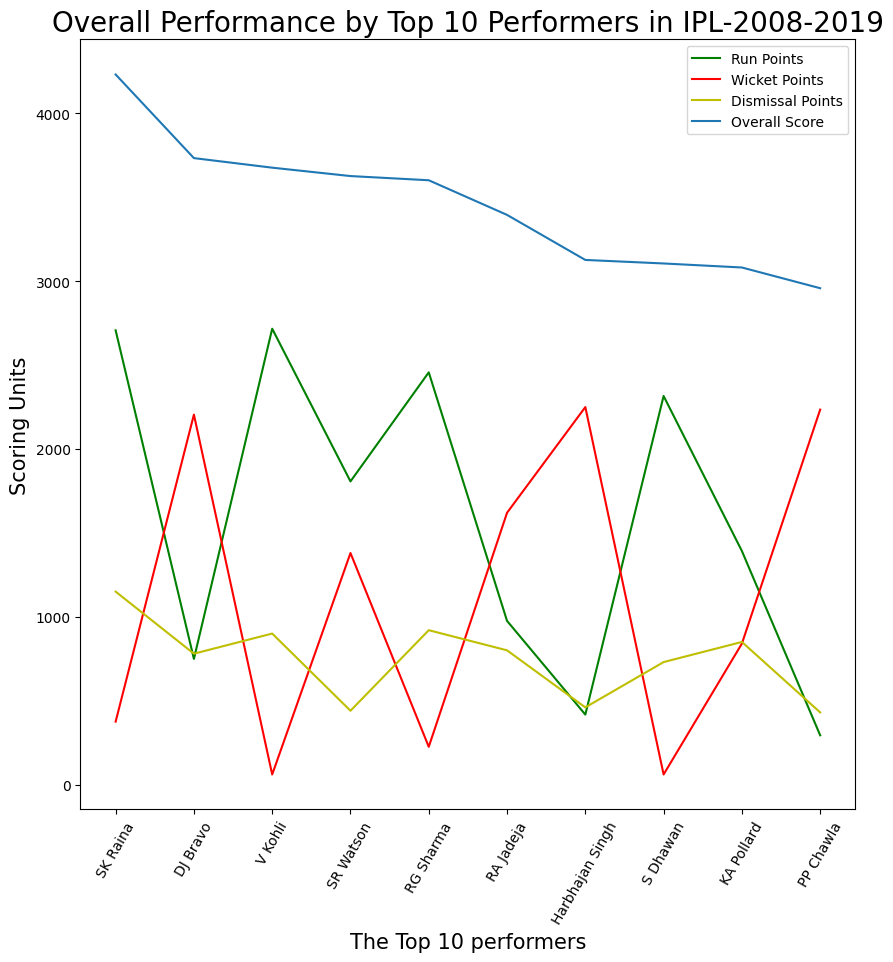

In [ ]:
batting_factor=0.5
bowling_factor=15.0
fielding_factor=10.0
all_rounding_1=pd.merge(batting_sorted,bowling_top,left_on='batsman',right_on='bowler',how='inner')
all_rounding_2=pd.merge(all_rounding_1,fielder_list_max,left_on='batsman',right_on='fielder',how='left')
all_rounding_performance=all_rounding_2.groupby(['batsman','Runs','Wickets','Dismissals']).apply(lambda x:(((x['Runs'])*batting_factor)+((x['Wickets'])*bowling_factor)+((x['Dismissals'])*fielding_factor))).reset_index(name='Overall Score')
best_all_round_performance=all_rounding_performance.sort_values(by='Overall Score',ascending=False)
best_overall=best_all_round_performance.loc[:,['batsman','Runs','Wickets','Dismissals','Overall Score']][0:10]
print('The top 10 best players overall are:\n',best_overall)
plt.figure(figsize=(10,10))
plt.plot(best_overall['batsman'],best_overall['Runs']*batting_factor,'g')
plt.plot(best_overall['batsman'],best_overall['Wickets']*bowling_factor,'r')
plt.plot(best_overall['batsman'],best_overall['Dismissals']*fielding_factor,'y')
plt.plot(best_overall['batsman'],best_overall['Overall Score'])
plt.xlabel('The Top 10 performers',size=15)
plt.ylabel('Scoring Units',size=15)
plt.xticks(rotation=60)
plt.title('Overall Performance by Top 10 Performers in IPL-2008-2019',size=20)
plt.legend(['Run Points','Wicket Points','Dismissal Points','Overall Score'])

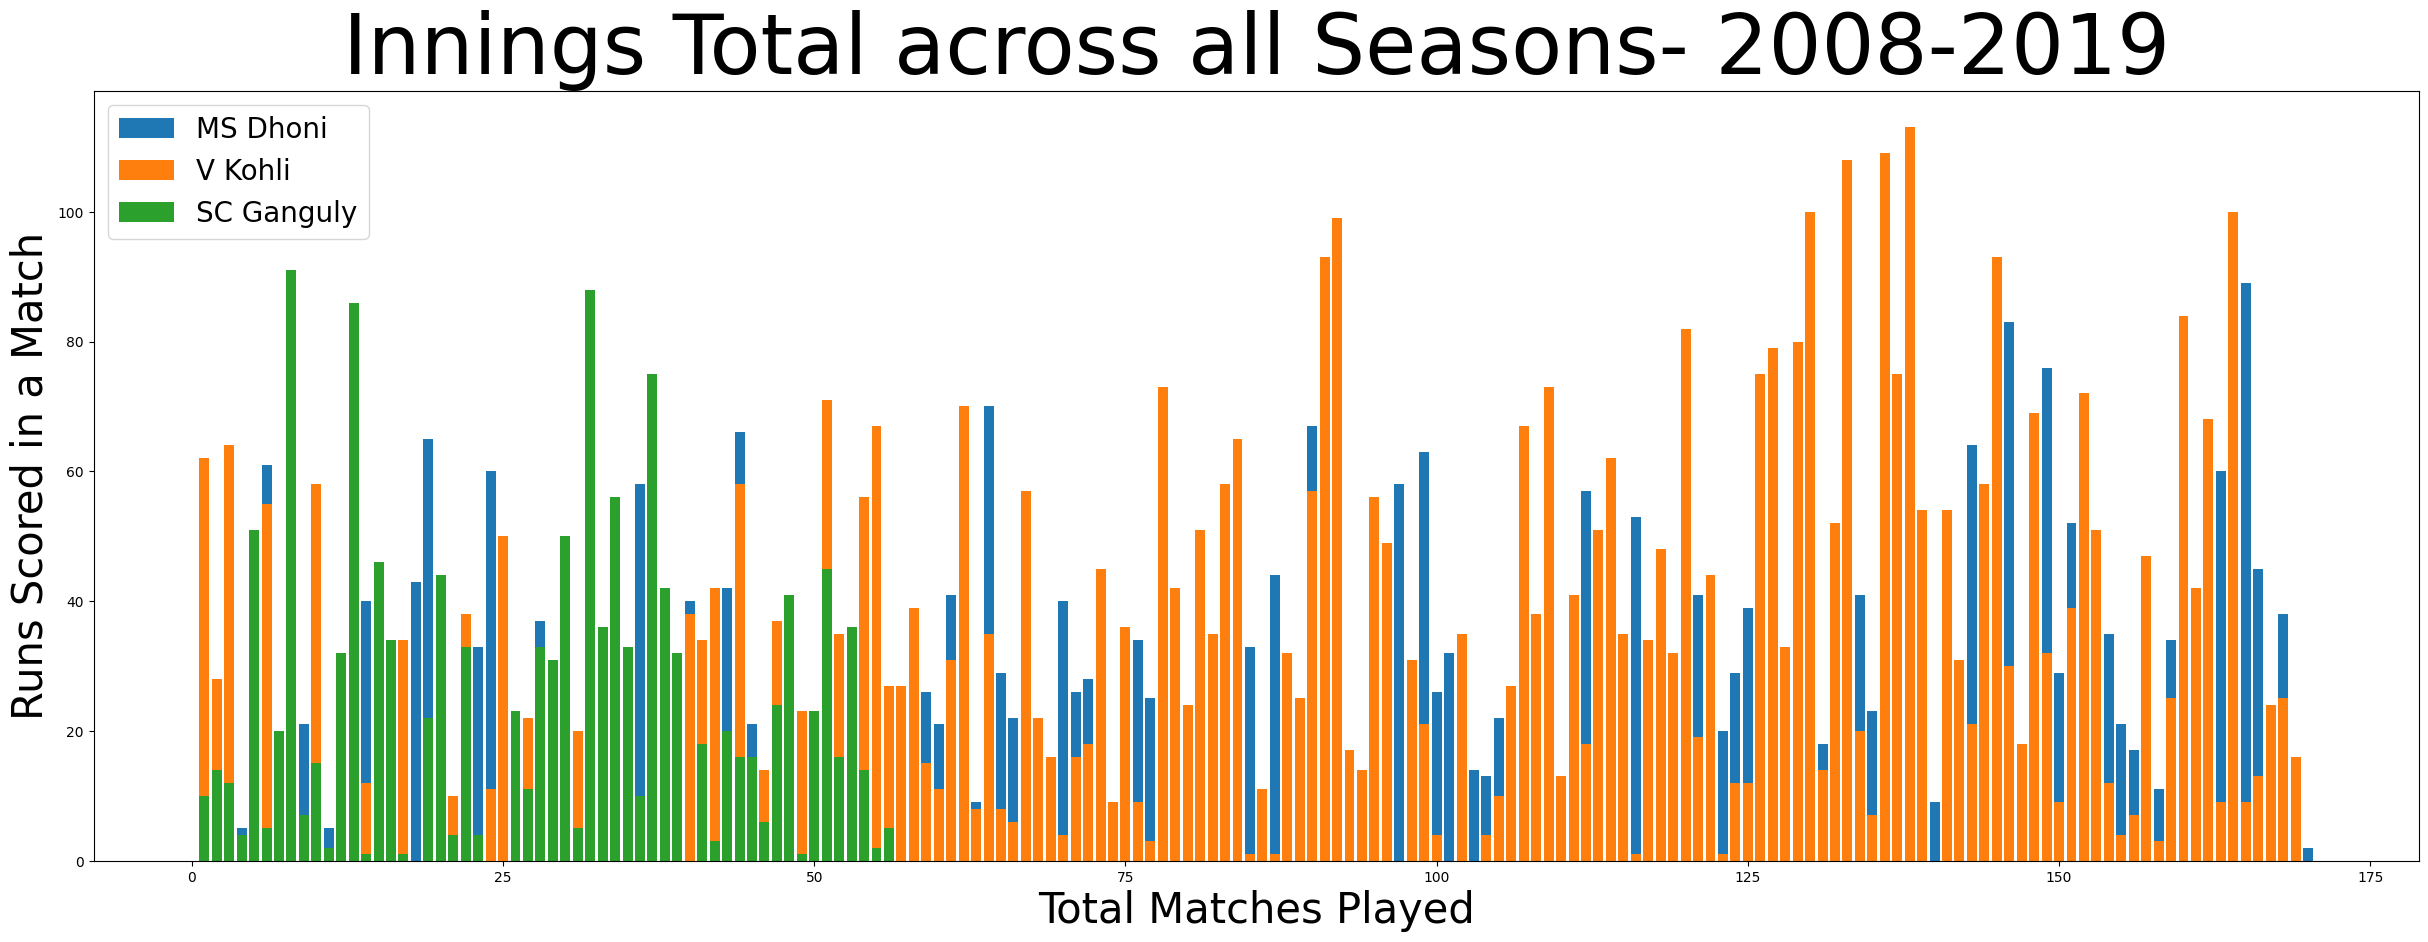

In [ ]:
batsman_list_req=['MS Dhoni','V Kohli','SC Ganguly']
batsman=deliveries[deliveries.batsman.isin(batsman_list_req)]
batsman_run=batsman.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
#bat_list=batsman.batsman.unique()
plt.figure(figsize=(30,10))
for name in batsman_list_req:
    batsman_check=batsman_run[batsman_run.batsman==name]
    batsman_check.index = np.arange(1, len(batsman_check) + 1)
    x=batsman_check.index
    y=batsman_check.Runs
    plt.bar(x,y)
plt.legend(batsman_list_req,prop={'size':20})
plt.title("Innings Total across all Seasons- 2008-2019",fontsize=60)
plt.xlabel("Total Matches Played",fontsize=30)
plt.ylabel("Runs Scored in a Match",fontsize=30)
plt.show()

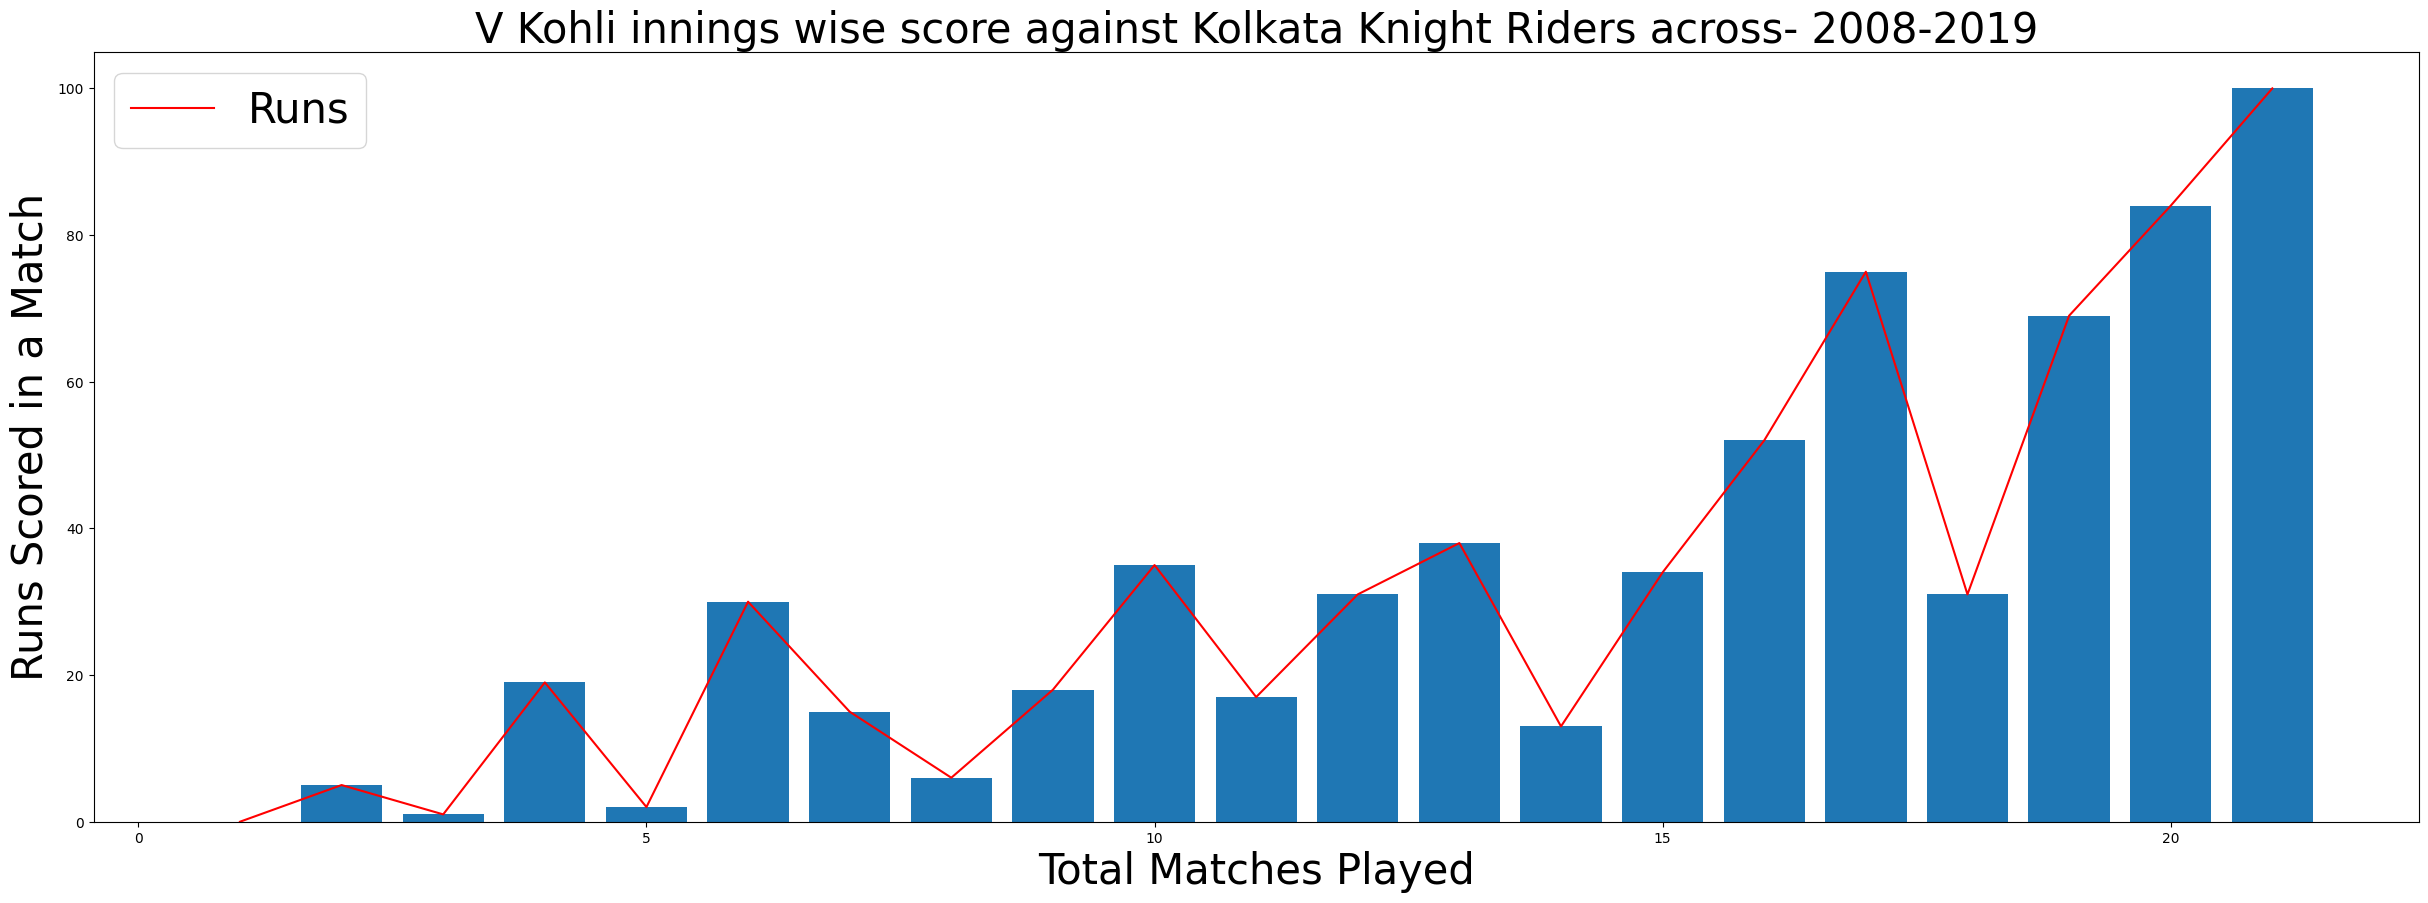

The runs scored in matches: 
 1       0
2       5
3       1
4      19
5       2
6      30
7      15
8       6
9      18
10     35
11     17
12     31
13     38
14     13
15     34
16     52
17     75
18     31
19     69
20     84
21    100
Name: Runs, dtype: int64
---------------------------------------------------------------------------------------------
The Economy rate of the various bowlers of Kolkata Knight Riders against the V Kohli (best to worst)
              bowler  Balls Bowled  Economy Rate
4         JH Kallis            35      5.142857
3     Iqbal Abdulla            13      5.538462
6          L Balaji            18      6.333333
1             B Lee            16      6.375000
10        SP Narine            94      6.382979
5     Kuldeep Yadav            35      6.685714
7          M Morkel            30      7.000000
11  Shakib Al Hasan            21      7.142857
12         UT Yadav            28      7.714286
9         PP Chawla            46      8.739130
0        AD

In [ ]:
batsman_list_req=['V Kohli']
opposition_team='Kolkata Knight Riders'
ball_limit=12
cond_1_1=deliveries.batsman.isin(batsman_list_req)
cond_1_2=deliveries.bowling_team==opposition_team
batsman_team=deliveries[(cond_1_1) & (cond_1_2)]
batsman_team_run=batsman_team.groupby(['match_id','batsman','bowling_team']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
bowling_runs=batsman_team.groupby('bowler').apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
bowling_balls=batsman_team.groupby('bowler').count()
bowled_balls=bowling_balls['ball'].reset_index(name='Balls Bowled')
bowled_balls_limit=bowled_balls[bowled_balls['Balls Bowled']>=ball_limit]
bowler_stats=pd.merge(bowling_runs,bowled_balls_limit,left_on='bowler',right_on='bowler',how='inner')
bowler_economy_rate=bowler_stats.groupby(['bowler','Balls Bowled']).apply(lambda x:(((x['Runs Conceeded'])/(x['Balls Bowled']))*6)).reset_index(name='Economy Rate')
bowler_best_to_worst_1=bowler_economy_rate.sort_values(by='Economy Rate',ascending=True)
bowler_best_to_worst=bowler_best_to_worst_1.loc[:,['bowler','Balls Bowled','Economy Rate']]
plt.figure(figsize=(30,10))
batsman_team_run.index = np.arange(1, len(batsman_team_run) + 1)
x=batsman_team_run.index
y=batsman_team_run.Runs
plt.bar(x,y)
plt.plot(x,y,'r')
plt.title("{} innings wise score against {} across- 2008-2019".format(batsman_list_req[0],opposition_team),fontsize=30)
plt.xlabel("Total Matches Played",fontsize=30)
plt.ylabel("Runs Scored in a Match",fontsize=30)
plt.legend(['Runs'],prop={'size':30})
plt.show()
print('The runs scored in matches: \n',y)
print('---------------------------------------------------------------------------------------------')
print('The Economy rate of the various bowlers of {} against the {} (best to worst)\n'.format(opposition_team,batsman_list_req[0]),bowler_best_to_worst)


# Team wise Analysis

Text(0.5, 1.0, 'Team wise Batting Average in IPL- Seasons 2008-2019')

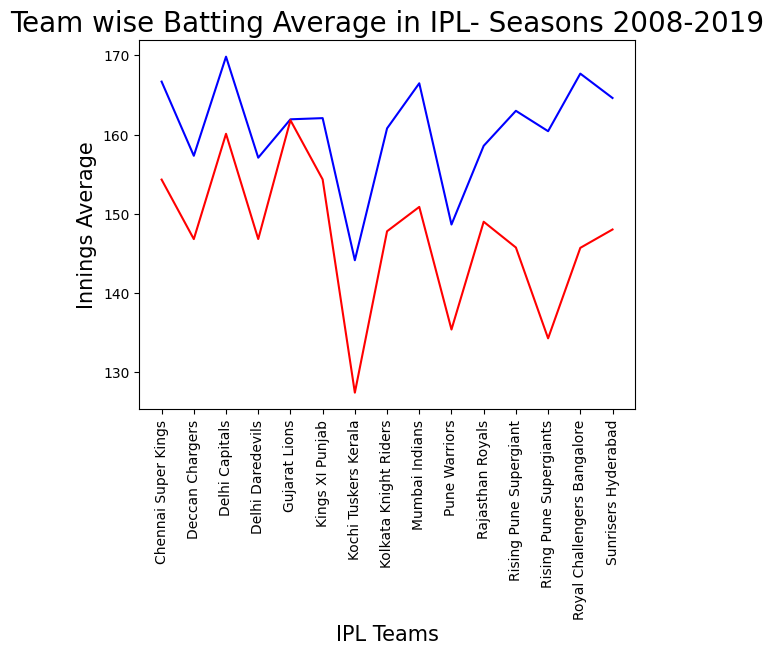

In [ ]:
first_innins_run=deliveries[deliveries['inning']==1]
team_innings_run=first_innins_run.groupby(['batting_team','match_id']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_innings_avg=team_innings_run.groupby('batting_team').apply(lambda x:np.mean(x['Innings Total'])).reset_index(name='Innings Average')
plt.plot(team_innings_avg['batting_team'],team_innings_avg['Innings Average'],'b')
second_innins_run=deliveries[deliveries['inning']==2]
team_innings_run=second_innins_run.groupby(['batting_team','match_id']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_innings_avg=team_innings_run.groupby('batting_team').apply(lambda x:np.mean(x['Innings Total'])).reset_index(name='Innings Average')
plt.plot(team_innings_avg['batting_team'],team_innings_avg['Innings Average'],'r')
plt.xticks(rotation=90)
plt.xlabel('IPL Teams',size=15)
plt.ylabel('Innings Average',size=15)
plt.title('Team wise Batting Average in IPL- Seasons 2008-2019',size=20)

Text(0.5, 1.0, 'Team wise Bowling Average in IPL- Seasons 2008-2019')

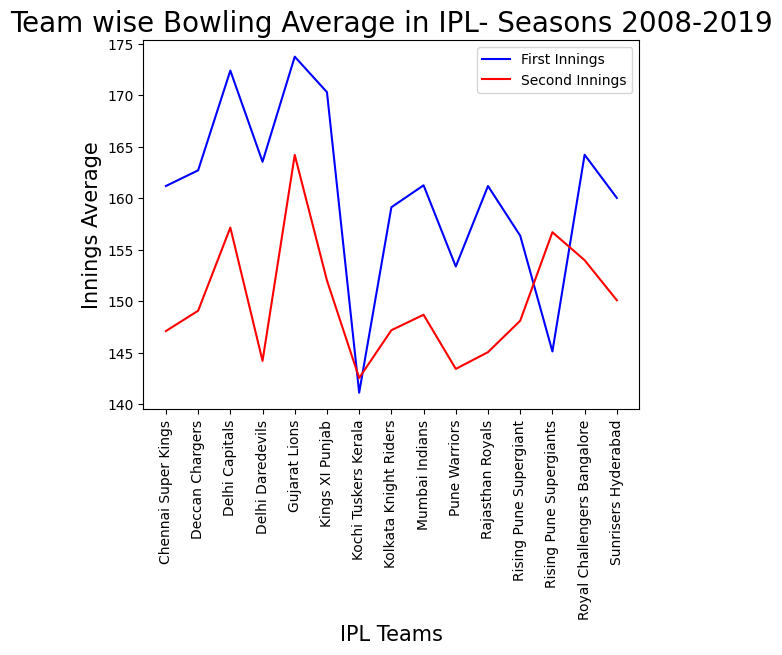

In [ ]:
first_innins_score=deliveries[deliveries['inning']==1]
team_innings_score=first_innins_score.groupby(['bowling_team','match_id']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_innings_score_avg=team_innings_score.groupby('bowling_team').apply(lambda x:np.mean(x['Innings Total'])).reset_index(name='Innings Average')
plt.plot(team_innings_score_avg['bowling_team'],team_innings_score_avg['Innings Average'],'b')
second_innins_score=deliveries[deliveries['inning']==2]
team_innings_second_score=second_innins_score.groupby(['bowling_team','match_id']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_second_innings_score_avg=team_innings_second_score.groupby('bowling_team').apply(lambda x:np.mean(x['Innings Total'])).reset_index(name='Innings Average')
plt.plot(team_second_innings_score_avg['bowling_team'],team_second_innings_score_avg['Innings Average'],'r')
plt.xticks(rotation=90)
plt.legend(['First Innings','Second Innings'],prop={'size':10})
plt.xlabel('IPL Teams',size=15)
plt.ylabel('Innings Average',size=15)
plt.title('Team wise Bowling Average in IPL- Seasons 2008-2019',size=20)

Text(0.5, 1.0, 'Teams Average winning by Runs/Wickets Summary')

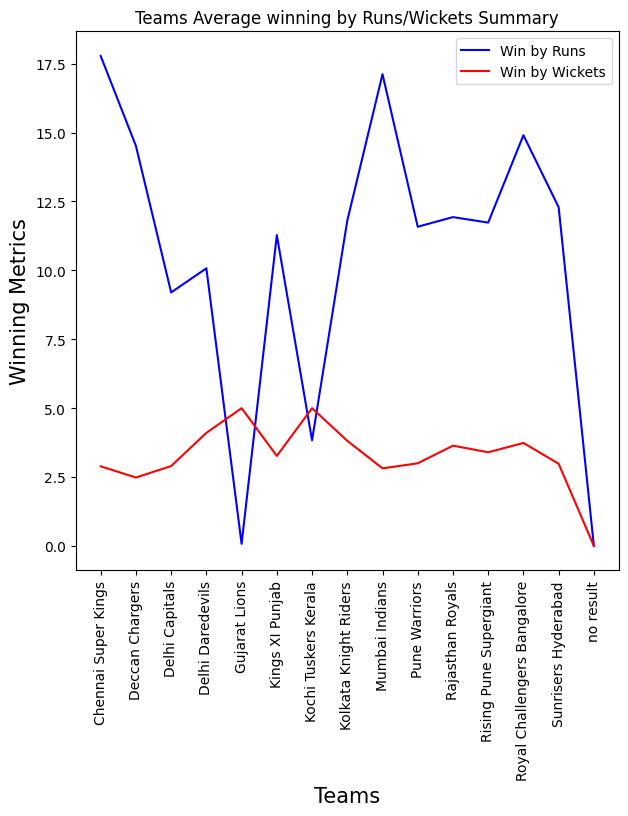

In [ ]:
win_runs=matches.groupby('winner').apply(lambda x:np.average(x['win_by_runs'])).reset_index(name='Win By Runs Average')
win_wickets=matches.groupby('winner').apply(lambda x:np.average(x['win_by_wickets'])).reset_index(name='Win By Wickets Average')
plt.figure(figsize=(7,7))
plt.plot(win_runs['winner'],win_runs['Win By Runs Average'],color='b')
plt.plot(win_wickets['winner'],win_wickets['Win By Wickets Average'],color='r')
plt.xlabel('Teams',size=15)
plt.xticks(rotation=90)
plt.ylabel('Winning Metrics',size=15)
plt.legend(['Win by Runs','Win by Wickets'])
plt.title('Teams Average winning by Runs/Wickets Summary')

Text(33.2222222222222, 0.5, 'Match')

<Figure size 640x480 with 0 Axes>

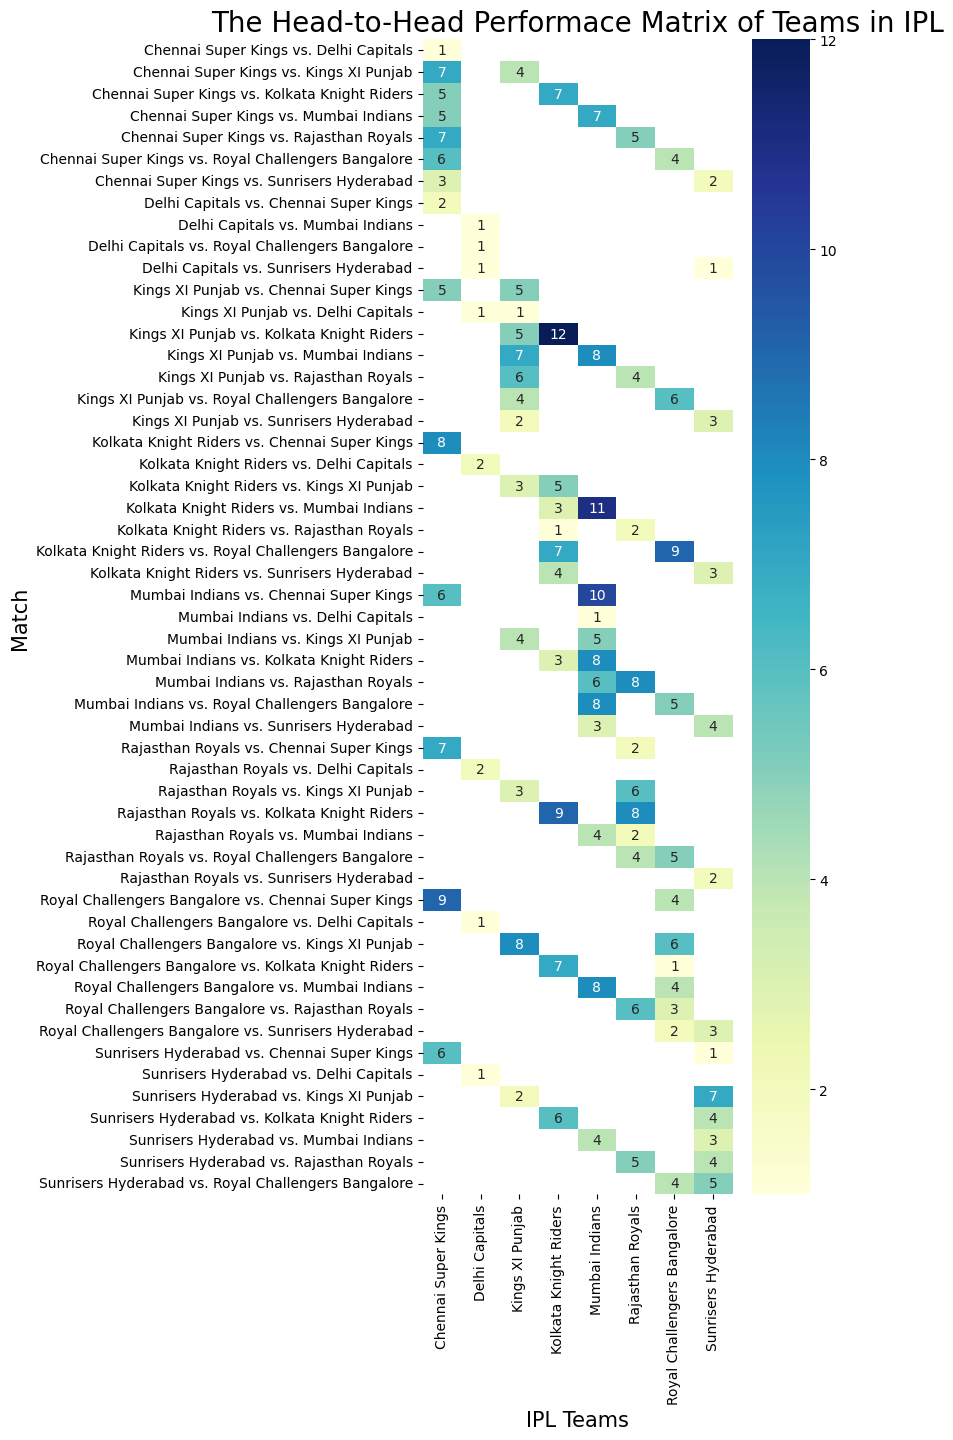

In [ ]:
Current_teams=['Chennai Super Kings','Mumbai Indians','Rajasthan Royals','Delhi Capitals','Sunrisers Hyderabad','Kolkata Knight Riders','Royal Challengers Bangalore','Kings XI Punjab']
team_1_filter=matches[matches.team1.isin(Current_teams)]
team_2_filter=team_1_filter[team_1_filter.team2.isin(Current_teams)]
teams_filter=team_2_filter[team_2_filter.winner.isin(Current_teams)]
head_to_head_matches=teams_filter.groupby(['team1','team2','winner']).apply(lambda x:x['winner'].count()).reset_index(name='Winning Counts')
head_to_head_matches['Game']=head_to_head_matches['team1']+' vs. '+head_to_head_matches['team2']
head_to_head_matches.loc[:,['Game','winner','Winning Counts']]
heatmap1_data = pd.pivot_table(head_to_head_matches, values='Winning Counts',
                     index=['Game'],
                     columns='winner')
fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(5,15))
g=sns.heatmap(heatmap1_data,annot=True, cmap="YlGnBu",fmt='g')
ax.set_title('The Head-to-Head Performace Matrix of Teams in IPL',size=20)
ax.set_xlabel('IPL Teams',size=15)
ax.set_ylabel('Match',size=15)

Text(0.5, 1.0, 'Team wise wins at the Venues')

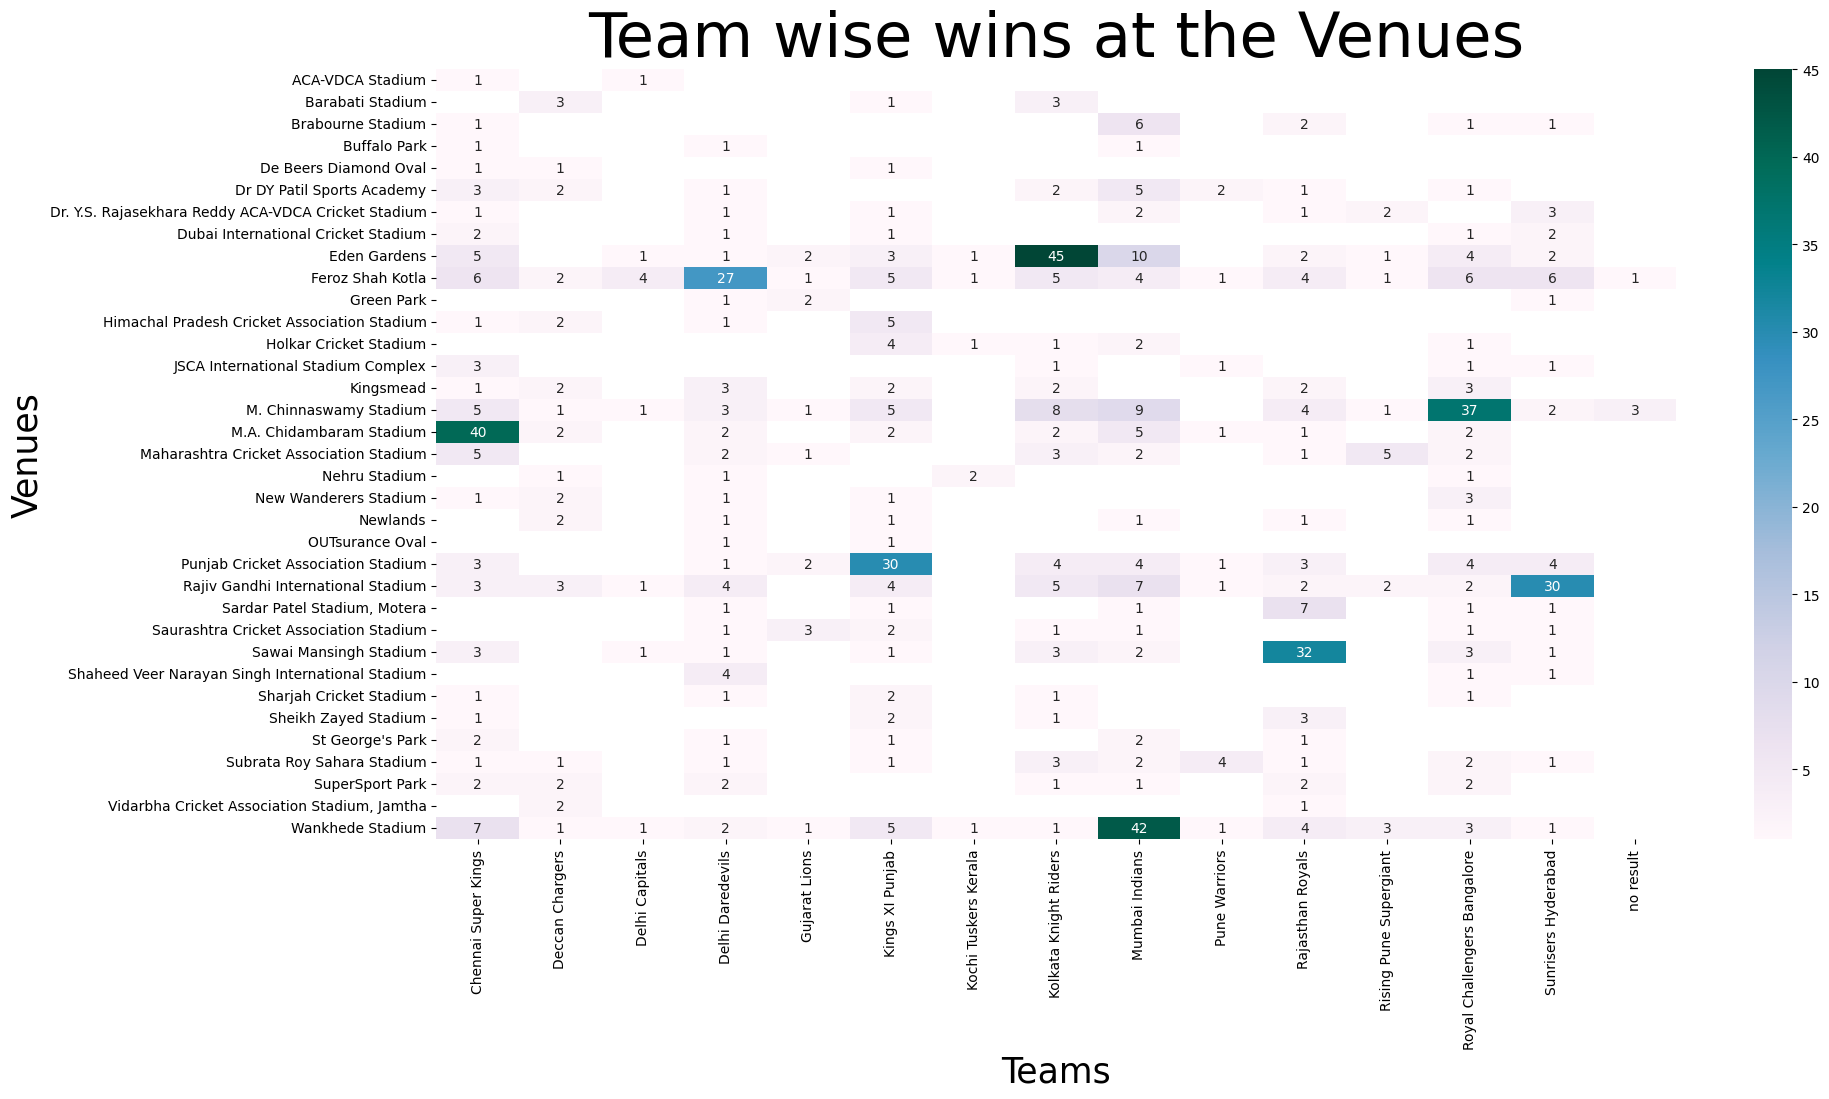

In [ ]:
venue_win=matches.groupby(['venue','winner']).apply(lambda x:x['winner'].count()).reset_index(name='Match Wins')
venue_win_pvt=pd.pivot(venue_win,values='Match Wins',index='venue',columns='winner')
venue_win_pvt.replace(np.NaN,0)
plt.figure(figsize=(20,10))
htmp=sns.heatmap(venue_win_pvt,annot=True,fmt='g',cmap='PuBuGn')
plt.xlabel('Teams',size=25)
plt.ylabel('Venues',size=25)
plt.title('Team wise wins at the Venues',size=45)

Text(0.5, 1.0, 'Players with the Best Performance at Venues')

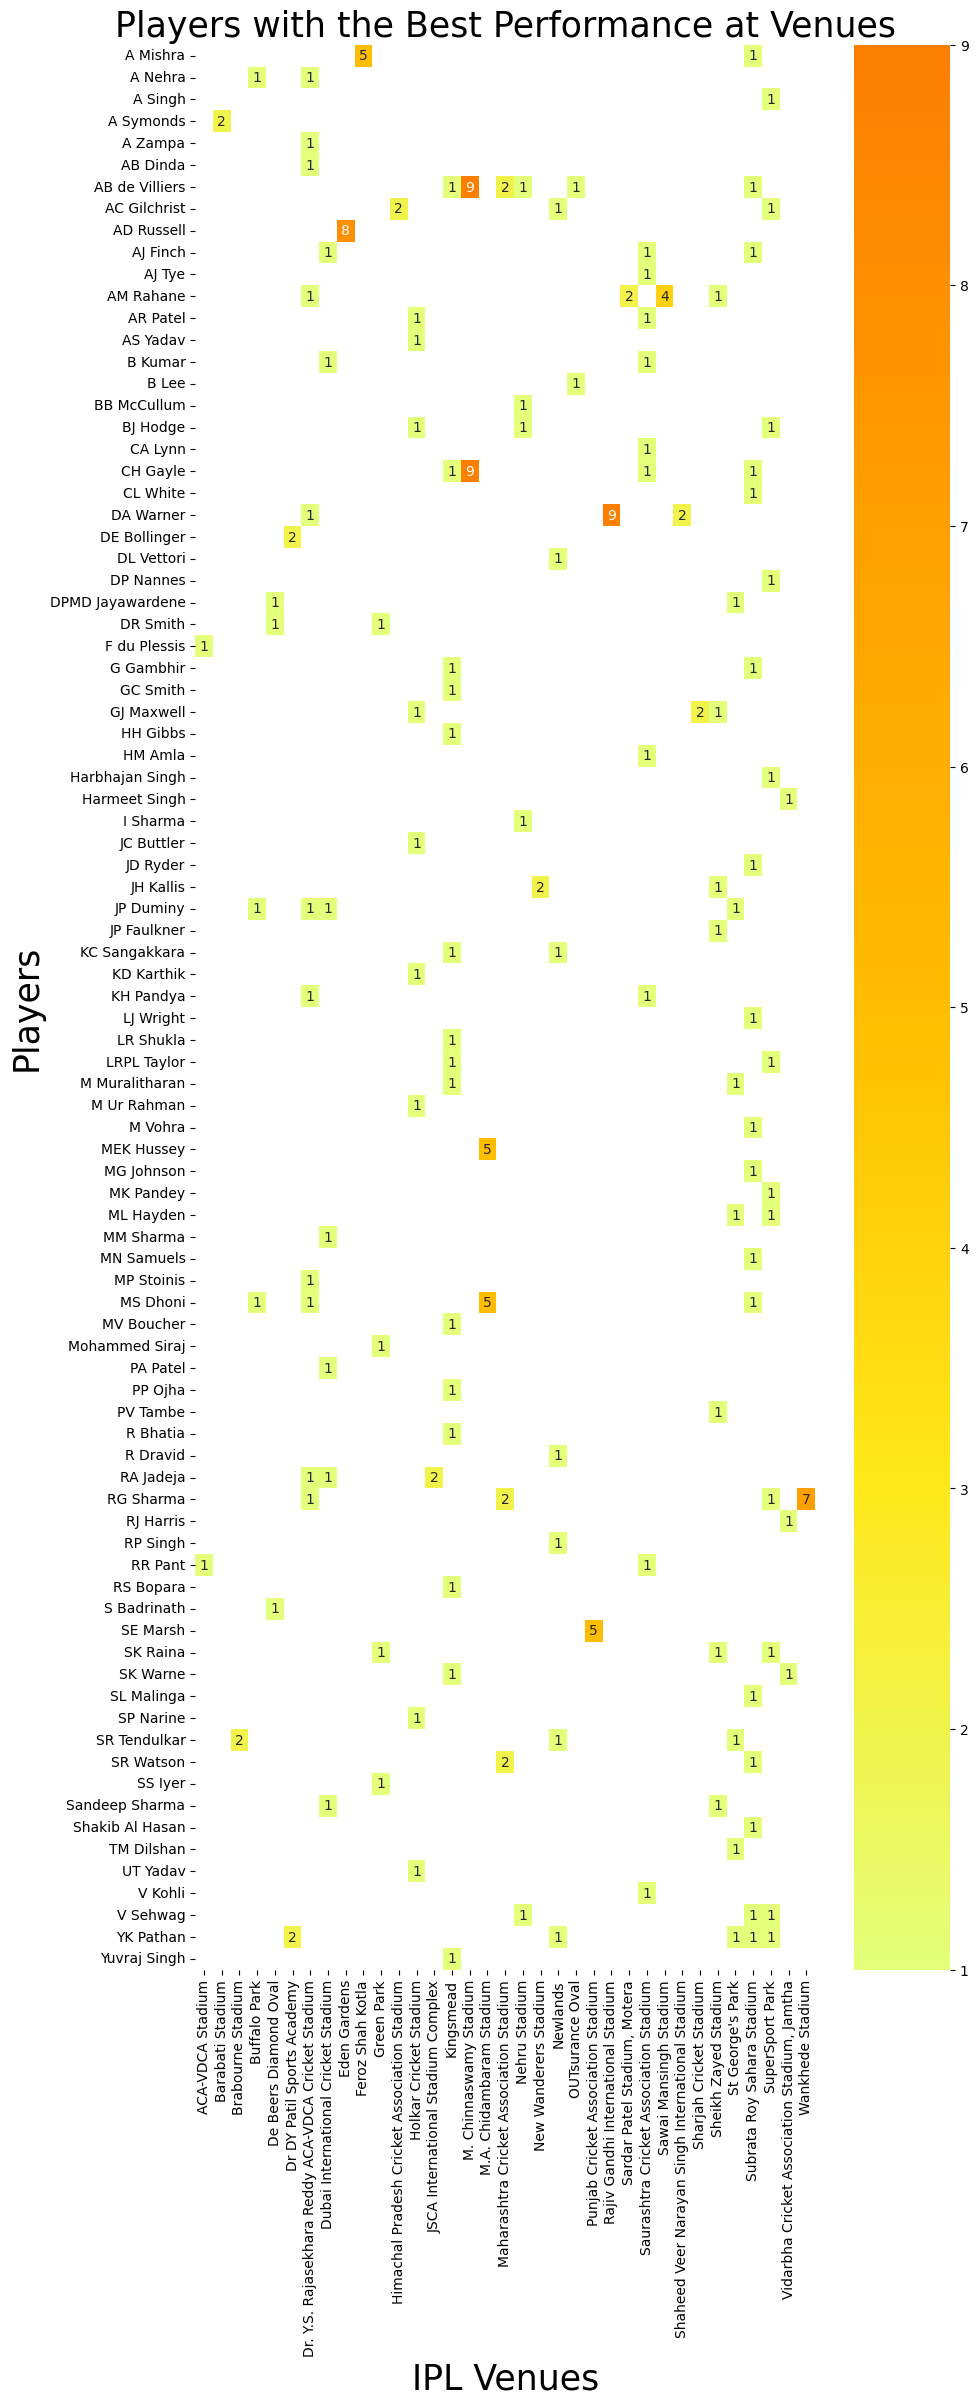

In [ ]:
venue_mom=matches.groupby(['venue','player_of_match']).apply(lambda x:x['player_of_match'].count()).reset_index(name='MoM_Winner')
venue_mom_sort=venue_mom.sort_values(by=['venue','MoM_Winner'],ascending=[True,False])
venue_mom_count_max=venue_mom_sort.groupby(['venue']).apply(lambda x:np.max(x['MoM_Winner'])).reset_index(name='MoM_Winner')
venue_best=pd.merge(venue_mom,venue_mom_count_max,how='inner',left_on=['venue','MoM_Winner'],right_on=['venue','MoM_Winner'])
venue_best_multiple_pivot=pd.pivot(venue_best,values='MoM_Winner',index='player_of_match',columns='venue')
plt.figure(figsize=(10,25))
sns.heatmap(venue_best_multiple_pivot,annot=True,fmt='g',cmap='Wistia')
plt.xlabel('IPL Venues',size=25)
plt.ylabel('Players',size=25)
plt.title('Players with the Best Performance at Venues',size=25)

Text(0.5, 1.0, 'The Toss Decisions taken by Venue Heatmap-in IPL')

<Figure size 640x480 with 0 Axes>

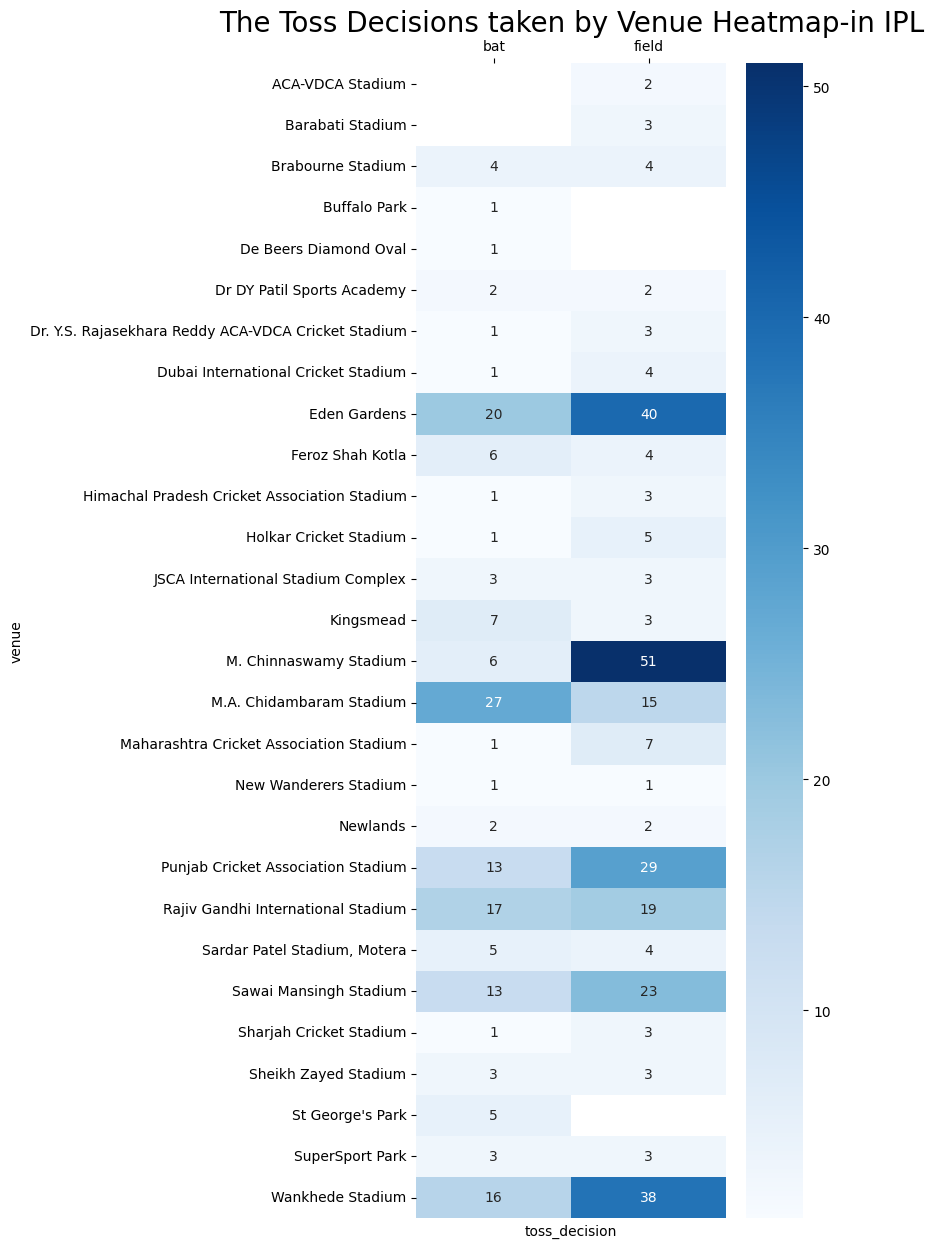

In [ ]:
venue_toss=teams_filter.groupby(['venue','toss_decision']).apply(lambda x:x['toss_decision'].count()).reset_index(name='Toss Decision Counts')
heatmap2_data = pd.pivot_table(venue_toss, values='Toss Decision Counts',
                     index=['venue'],
                     columns='toss_decision')
fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(5,15))
g=sns.heatmap(heatmap2_data,annot=True, cmap="Blues",fmt='g')
g.xaxis.set_ticks_position("top")
ax.set_title('The Toss Decisions taken by Venue Heatmap-in IPL',size=20)

In [ ]:
venue_toss_result=teams_filter.groupby(['venue','toss_decision']).apply(lambda x:np.sum(np.where(x['toss_winner']==x['winner'],1,0))).reset_index(name='Toss Winner Wins Match')
merged_venue_data=pd.merge(venue_toss_result,venue_toss,how='inner',left_on=['venue','toss_decision'],right_on=['venue','toss_decision'])
merged_venue_data['Toss Winner Lose Match']=merged_venue_data['Toss Decision Counts']-merged_venue_data['Toss Winner Wins Match']
merged_data_arranged=merged_venue_data.loc[:,['venue','toss_decision','Toss Decision Counts','Toss Winner Wins Match','Toss Winner Lose Match']]
merged_data_arranged

,venue,toss_decision,Toss Decision Counts,Toss Winner Wins Match,Toss Winner Lose Match
0,ACA-VDCA Stadium,field,2,2,0
1,Barabati Stadium,field,3,2,1
2,Brabourne Stadium,bat,4,2,2
3,Brabourne Stadium,field,4,3,1
4,Buffalo Park,bat,1,1,0
5,De Beers Diamond Oval,bat,1,0,1
6,Dr DY Patil Sports Academy,bat,2,2,0
7,Dr DY Patil Sports Academy,field,2,2,0
8,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,bat,1,0,1
9,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,field,3,1,2


Text(70.72222222222219, 0.5, 'Stadium')

<Figure size 640x480 with 0 Axes>

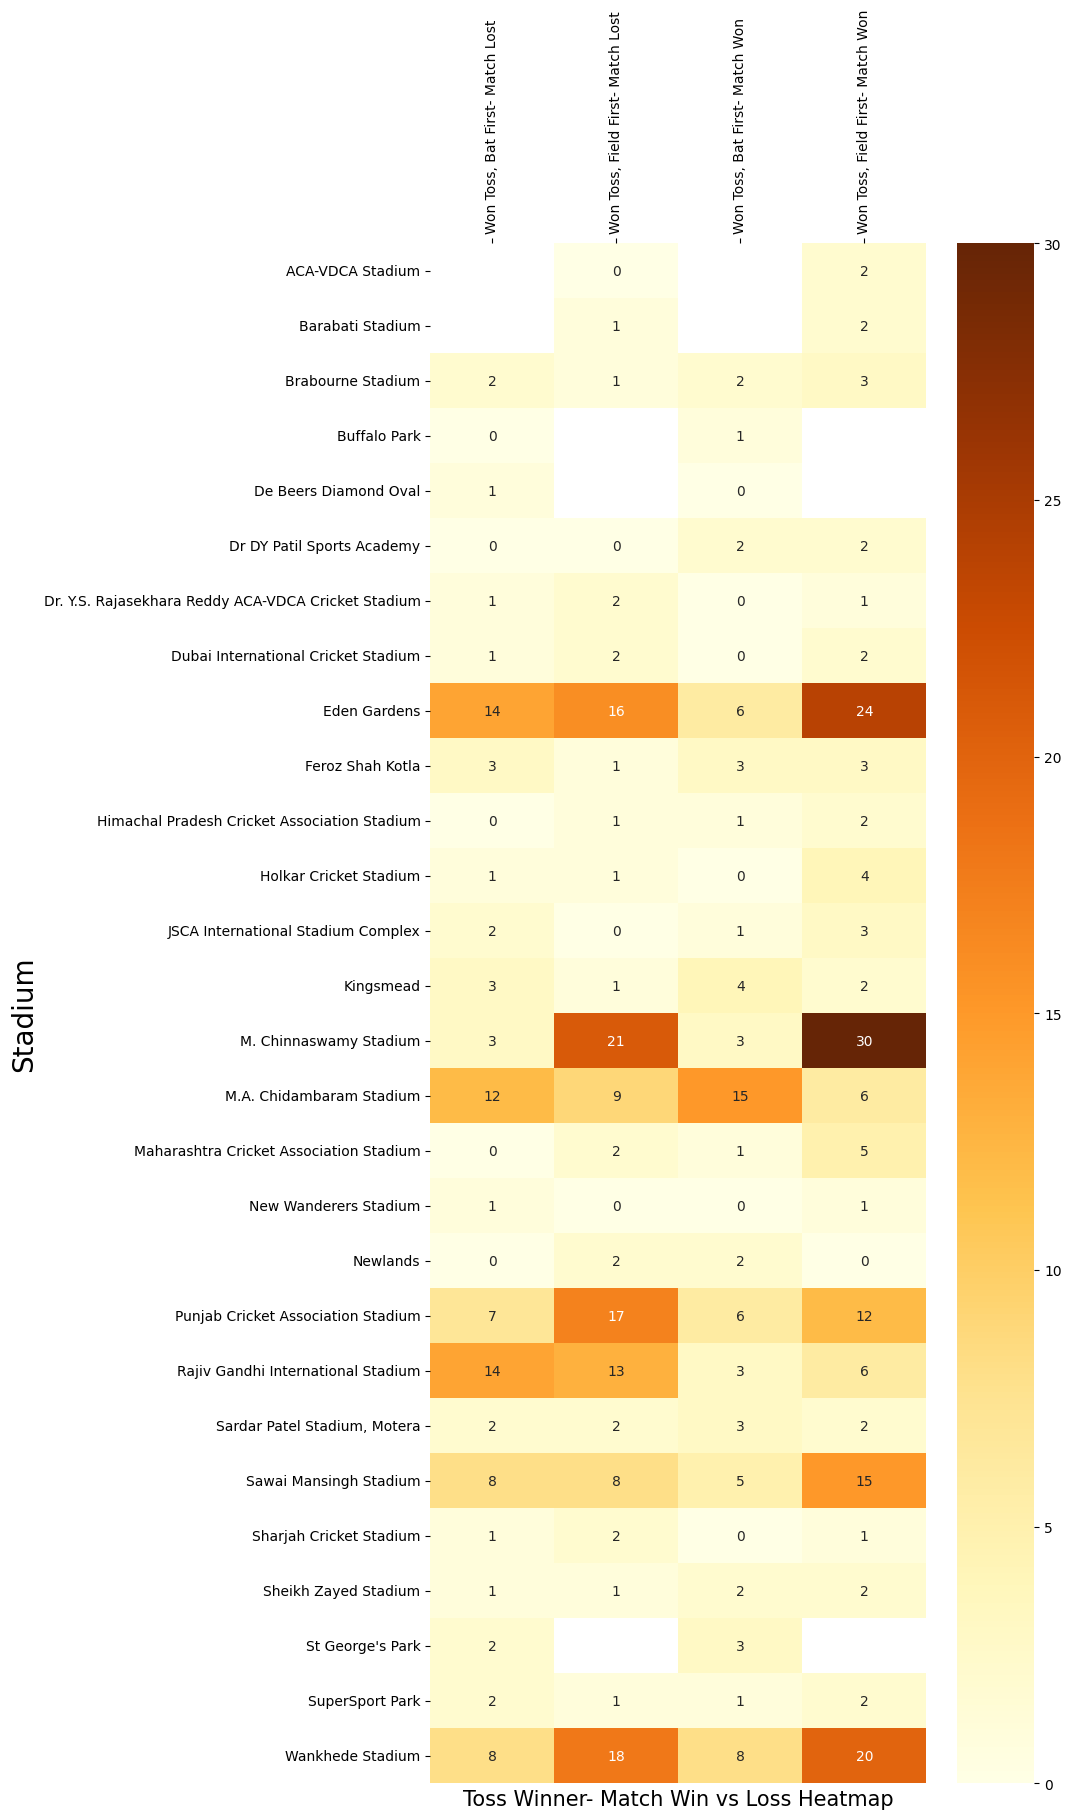

In [ ]:
heatmap3_data = pd.pivot_table(merged_venue_data, values=['Toss Winner Wins Match','Toss Winner Lose Match'],
                     index=['venue'],
                     columns='toss_decision')
fig=plt.figure()
fig,ax1=plt.subplots(1,1,figsize=(8,20))
g=sns.heatmap(heatmap3_data,annot=True,cmap='YlOrBr',fmt='g')
g.xaxis.set_ticks_position("top")
g.set_xticklabels(['Won Toss, Bat First- Match Lost','Won Toss, Field First- Match Lost','Won Toss, Bat First- Match Won','Won Toss, Field First- Match Won'],rotation=90)
g.set_xlabel('Toss Winner- Match Win vs Loss Heatmap',size=15)
g.set_ylabel('Stadium',size=20)